<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼

---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [3]:
import numpy as np


In [5]:
import pandas as pd


## CSV 파일 데이터 읽어오기

In [202]:
df = pd.read_csv('./data/cust_data_v1.csv')

In [204]:
# 읽어온 데이터프레임 확인하기
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# #2. 탐색적 데이터 분석

## 데이터 탐색하기

## 자료구조 파악

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 데이터 타입, 인덱스, 컬럼명, Values 확인

In [209]:
for i in range(21):
    print(df.loc[i])

customerID                7590-VHVEG
gender                           NaN
SeniorCitizen                    0.0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract                         NaN
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object
customerID            5575-GNVDE
gender                      Male
SeniorCitizen                0.0
Partner                       No
Dependents                    No
tenure                        34
Ph

In [211]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [213]:
df['gender'].value_counts() #성별 남성이 70명 더 많음

gender
Male      3552
Female    3482
Name: count, dtype: int64

In [215]:
df['SeniorCitizen'].value_counts() #고령자 여부 맞으면1, 아니면0 : 아닌사람이 4758더 많음

SeniorCitizen
0.0    5900
1.0    1142
Name: count, dtype: int64

In [217]:
df['Partner'].value_counts() #파트너가 있다/없다: 없는 사람이 239명 더 많음

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [219]:
df['Dependents'].value_counts() #부양가족 여부 있다/없다: 없는 사람이 2823 더 많다

Dependents
No     4932
Yes    2109
Name: count, dtype: int64

In [221]:
df['tenure'].value_counts(),  df['tenure'].mean() 
#서비스 사용개월수: 1개월(613),72개월(362)순으로 많고
#36개월(50), 0개월(11)순으로 적다. 평균 개월 수는 32개월정도

(tenure
 1     613
 72    362
 2     238
 3     200
 4     176
      ... 
 28     57
 39     56
 44     51
 36     50
 0      11
 Name: count, Length: 73, dtype: int64,
 32.37114865824223)

In [223]:
df['PhoneService'].value_counts()
#폰 서비스가 있다/없다: 있는 사람이 5676더 많다. 9.3배정도 차이남

PhoneService
Yes    6358
No      682
Name: count, dtype: int64

In [225]:
df['MultipleLines'].value_counts()
#MultipleLines이 있다/없다/폰서비스가 없다 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [227]:
df['InternetService'].value_counts()
#인터넷서비스 provider Fiber optic/DSL/No 순으로 많다. No가 1526

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [229]:
df['OnlineSecurity'].value_counts()
#OnlineSecurity이 없다/있다/인터넷서비스가 없다 순으로 많다. 
#앞선 문항의 인터넷서비스 provider이 없다와 똑같은 숫자 1526

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [231]:
df['OnlineBackup'].value_counts()
#OnlineBackup이 없다/있다/인터넷서비스가 없다 순으로 많다.

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [233]:
df['DeviceProtection'].value_counts()
#DeviceProtection이 없다/있다/인터넷서비스가 없다 순으로 많다.
#앞선 문항들의 인터넷서비스가 없다에 체크한 사람은 1526명으로 일정했는데 
#이 항목은 778명으로 현저히 작아졌다.
#이유가 뭘까? -결측치 (3463)가 굉장히 많음.
#결측치가 많은 이유는? -문항 이해 어려움(device가 어떤 device인지) ,, 등

DeviceProtection
No                     1549
Yes                    1253
No internet service     778
Name: count, dtype: int64

In [235]:
df['TechSupport'].value_counts()
#TechSupport이 없다/있다/인터넷 서비스가 없다 순으로 많다.

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [237]:
df['StreamingTV'].value_counts()
#StreamingTV이 없다/있다/인터넷 서비스가 없다 순으로 많다.

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [239]:
df['StreamingMovies'].value_counts()
#StreamingMovies가 없다>있다>인터넷 서비스가 없다 순으로 많다.

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [241]:
df['Contract'].value_counts()
#Contract term이 달마다>2년>1년 순으로 많다

Contract
Month-to-month    3874
Two year          1695
One year          1473
Name: count, dtype: int64

In [243]:
df['PaperlessBilling'].value_counts()
#전자형식으로 청구서를 받는다>받지 않는다 : 1299명 더 많음

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [245]:
df['MonthlyCharges'].value_counts()
#월별 청구금액 : 20.05가 가장 많음(61) 평균금액:64.763256
#같은 요금을 내는 사람이 많이 없는 걸로 보임. 세분화되어있다


MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [247]:
df['TotalCharges'].value_counts()
# 총 청구금액-어떤 기간동안인지 명확하지 않음!!
#20.2가 11명으로 가장 많은데 천 단위도 있는것으로 보아 
#월별 요금과 총 청구금액을 헷갈렸을 가능성도 있음

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [249]:
df['TotalCharges'].value_counts().keys()

Index([' ', '20.2', '19.75', '20.05', '19.9', '19.65', '45.3', '19.55',
       '20.15', '20.25',
       ...
       '3306.85', '424.75', '6565.85', '2117.2', '203.95', '6849.4', '692.35',
       '130.15', '3211.9', '6844.5'],
      dtype='object', name='TotalCharges', length=6531)

In [251]:
df['Churn'].value_counts()
#서비스를 이탈할 것인가 아니다>맞다 
#이탈할 것이라 한 사람이 1869

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Null 데이터 확인

In [254]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

## 통계 정보

In [257]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# #3. 데이터 전처리 수행

## 자료구조 파악

## 컬럼 삭제

In [263]:
#불필요한 컬럼 삭제
del df['customerID']        
#ID에 특별한 의미가 있지 않으므로 인텍스 숫자를 ID 대신 사용

In [265]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

- TotalCharges 컬럼 타입 변경하기

In [269]:
#TotalCharges가 object로 되어있으므로 float로 변경
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [271]:
df['TotalCharges'].replace([' '],['0'],inplace=True) 

In [273]:
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [275]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7042.000000,7043.000000,7042.000000,7043.000000
mean,0.162170,32.371149,64.763256,2279.734304
std,0.368633,24.559481,30.091898,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- Churn 컬럼의 문자열값을 숫자로 변경

In [279]:
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)

C:\Users\엄지영\AppData\Local\Temp\ipykernel_13600\2079555887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(['Yes','No'],[1,0],inplace=True)
C:\Users\엄지영\AppData\Local\Temp\ipykernel_13600\2079555887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace(['Yes

In [281]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Null 데이터 확인

In [285]:
df.isnull().sum()

gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

- 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

In [288]:
1.결측치가 많은 컬럼: DeviceProtection 결측치가 많아 분석가치가 없음. 컬럼 제거
2.결측치가 적은 컬럼:dropna로 결측치 제거

SyntaxError: invalid syntax (1711999270.py, line 1)

In [290]:
df.drop(['DeviceProtection'], axis='columns', inplace=True )
df.dropna(inplace=True)

In [292]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [296]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

# #4. 시각화

## 라이브러리 임포트

In [303]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Bar 차트

<Axes: xlabel='gender'>

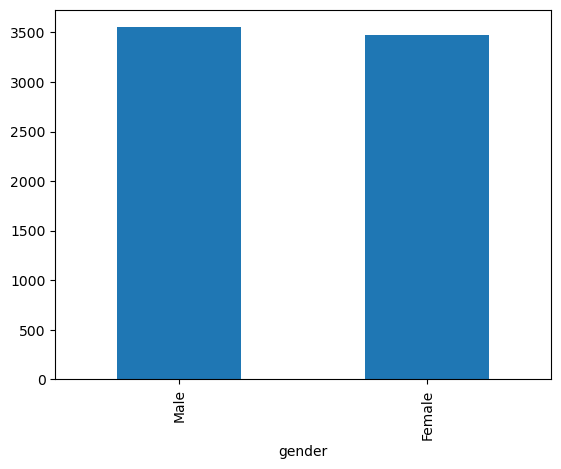

In [307]:
df['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Partner'>

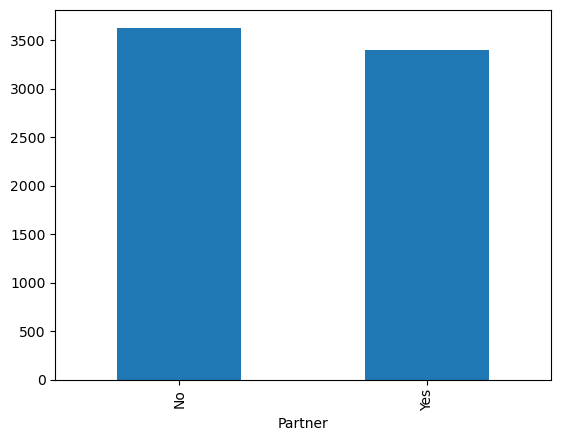

In [309]:
df['Partner'].value_counts().plot(kind='bar')

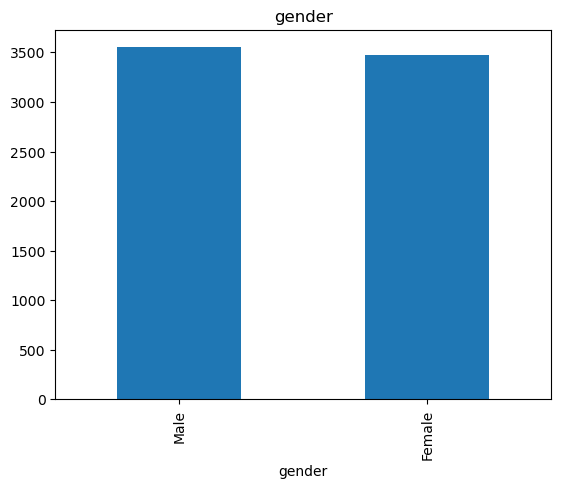

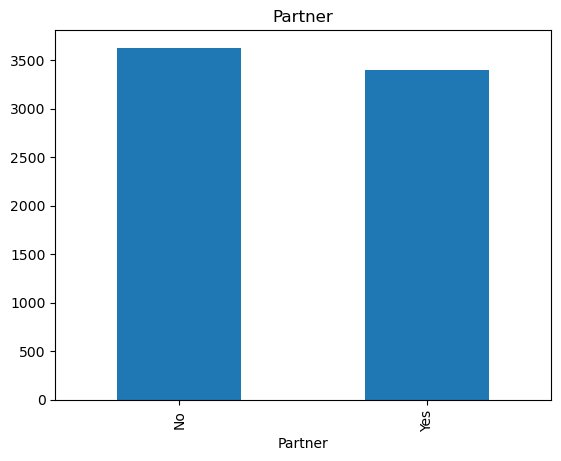

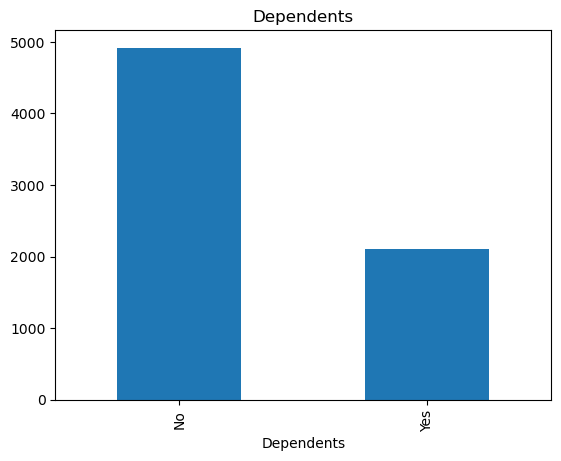

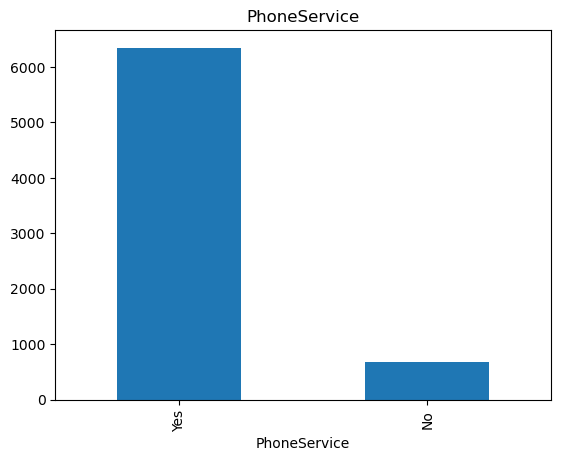

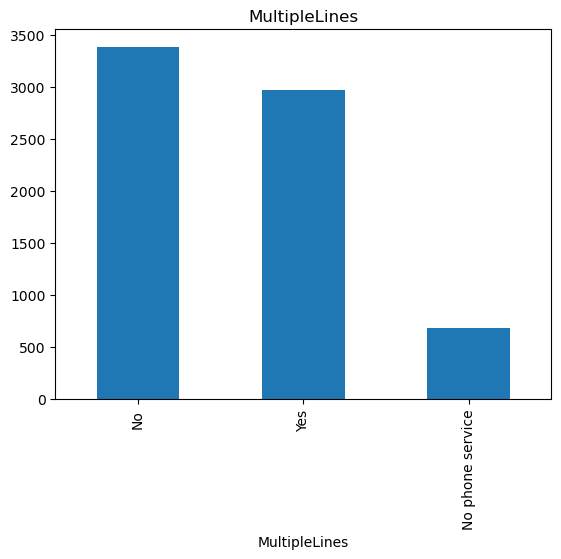

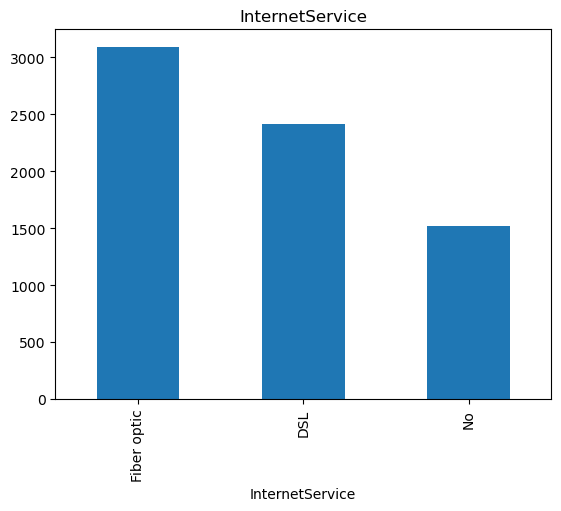

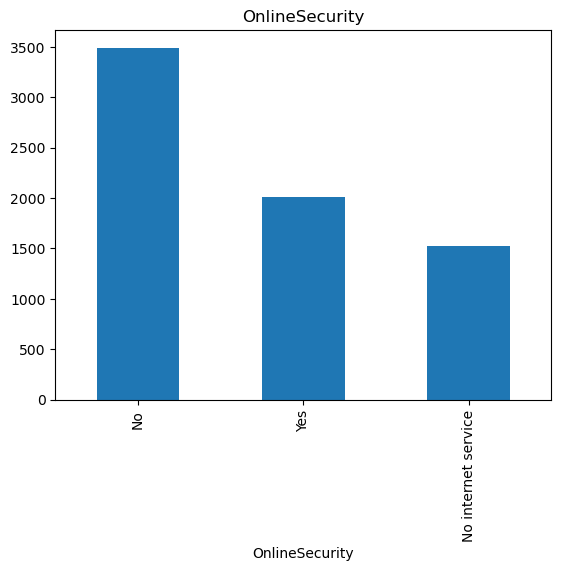

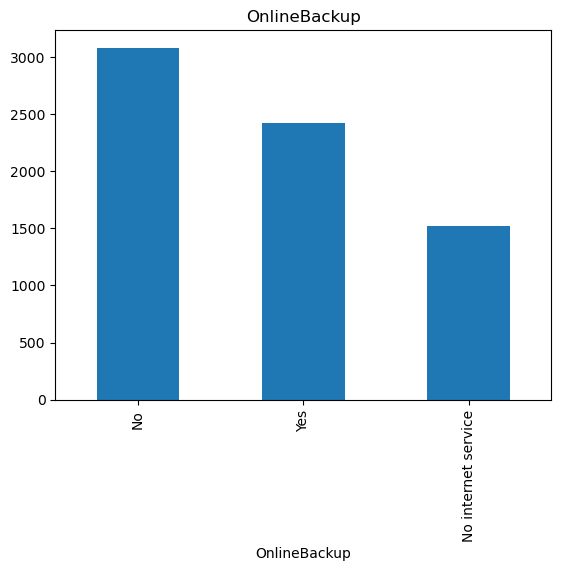

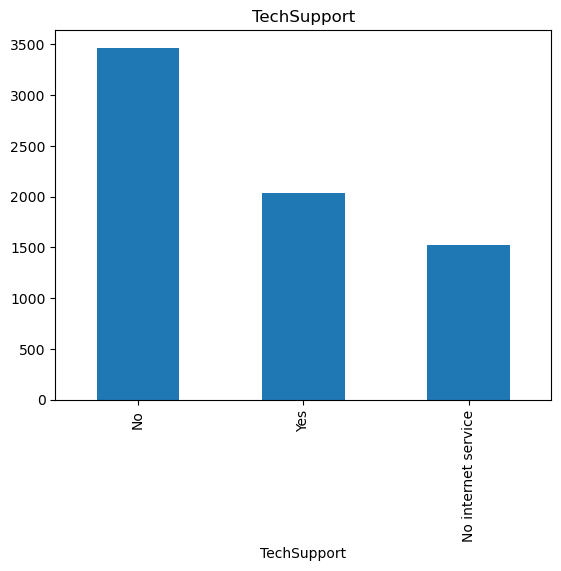

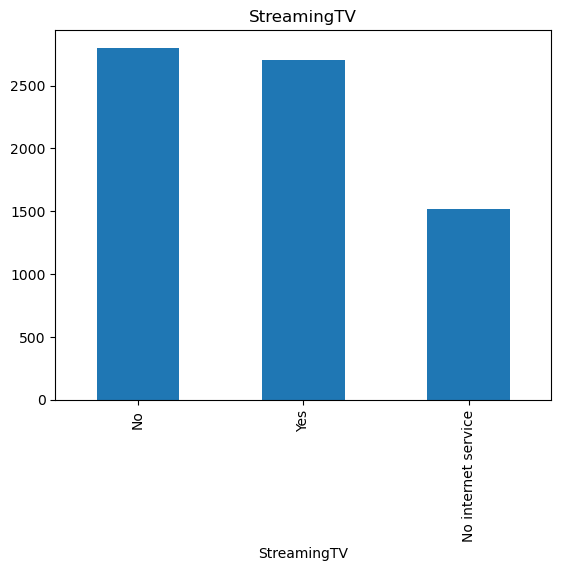

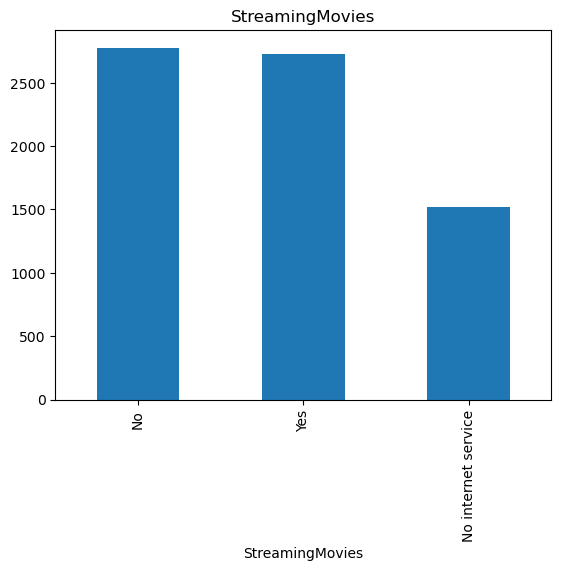

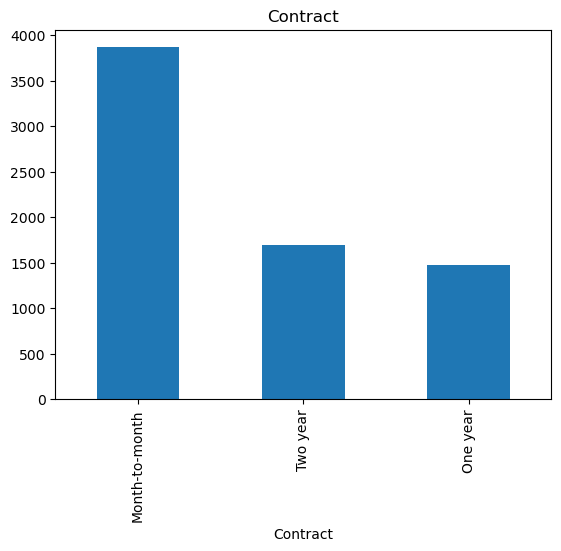

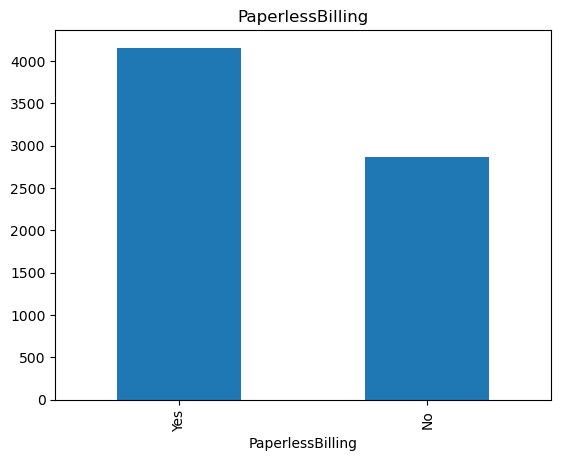

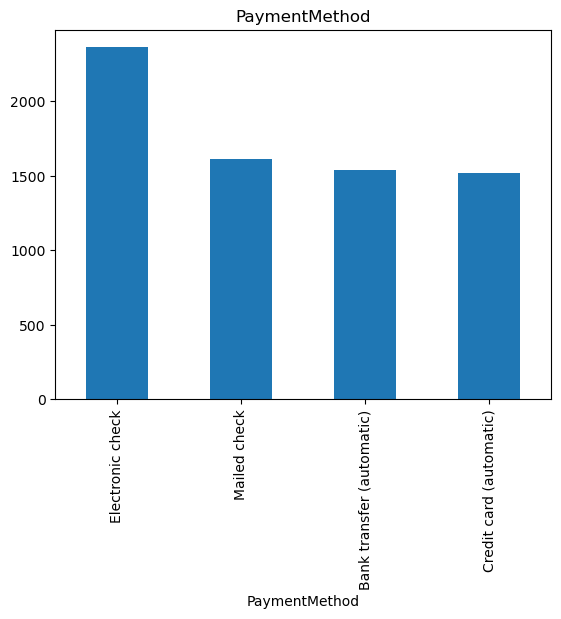

In [311]:
object_list = df.select_dtypes('object').columns.values

for col in object_list:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

- 불균형 심한 PhoneService 컬럼 삭제

In [313]:
df.drop(['PhoneService'], axis='columns', inplace=True )

In [316]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## 숫자형 컬럼에 대한 시각화

- Churn 컬럼

<Axes: xlabel='Churn'>

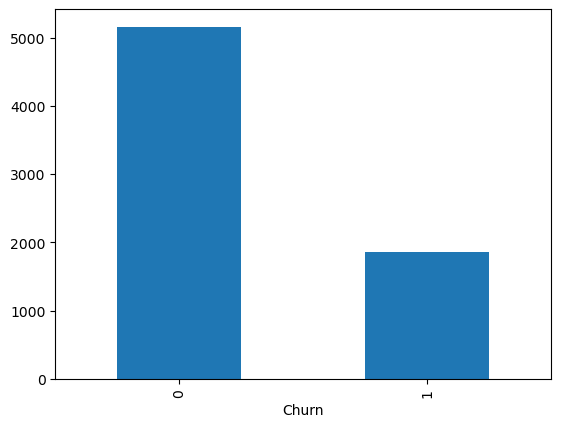

In [318]:
df['Churn'].value_counts().plot(kind='bar')

- SeniorCitizen 컬럼

<Axes: xlabel='SeniorCitizen'>

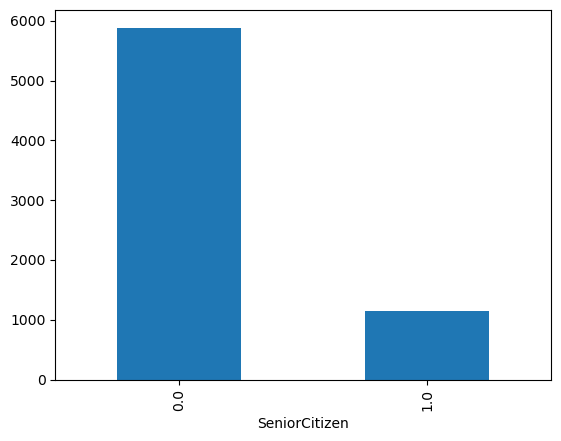

In [320]:
df['SeniorCitizen'].value_counts().plot(kind='bar')

## Histgram

In [31]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

- tenure 컬럼

<Axes: xlabel='tenure', ylabel='Count'>

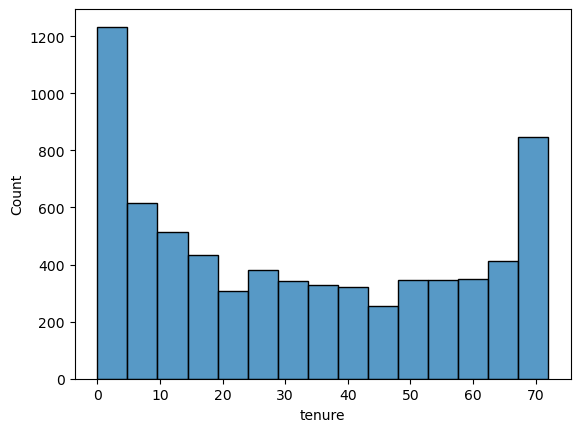

In [322]:
sns.histplot(data=df, x='tenure')

<Axes: xlabel='tenure', ylabel='Count'>

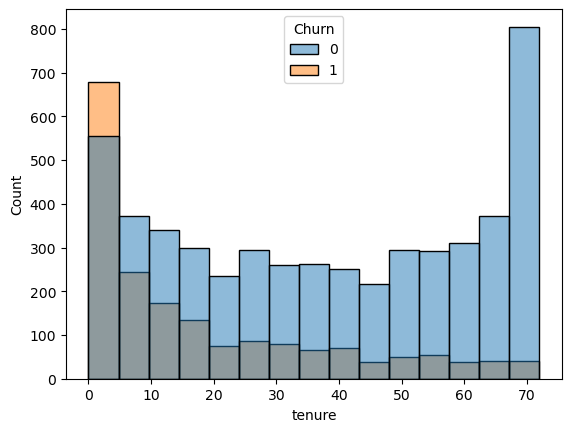

In [324]:
sns.histplot(data=df, x='tenure', hue='Churn')

- TotalCharges 컬럼

<Axes: xlabel='TotalCharges', ylabel='Count'>

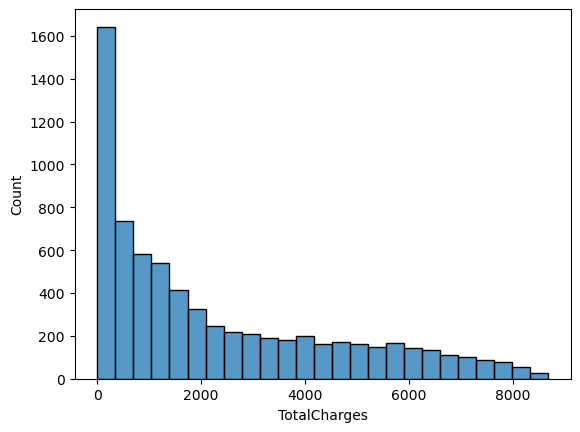

In [326]:
sns.histplot(data=df, x='TotalCharges')

## Countplot

<Axes: xlabel='MultipleLines', ylabel='count'>

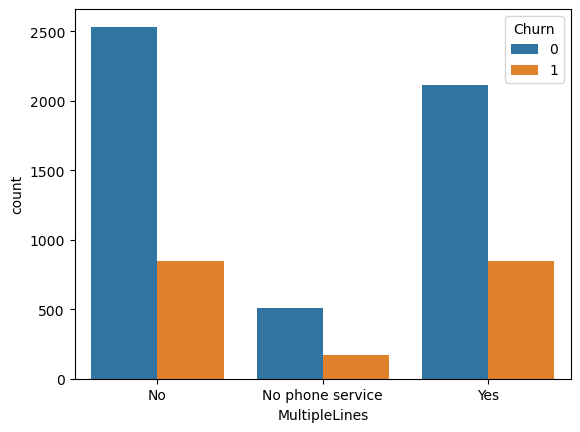

In [328]:
sns.countplot(data=df, x='MultipleLines',  hue='Churn')

## heatmap

<Axes: >

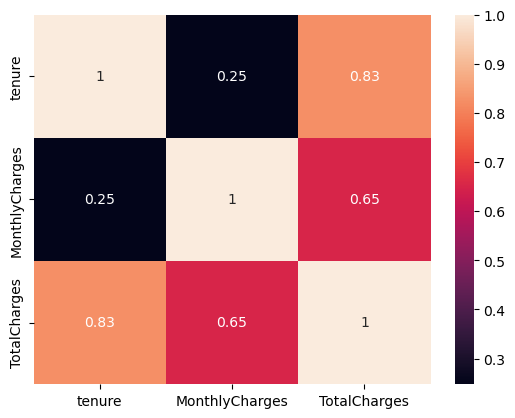

In [330]:
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True)

## boxplot

<Axes: xlabel='Churn', ylabel='TotalCharges'>

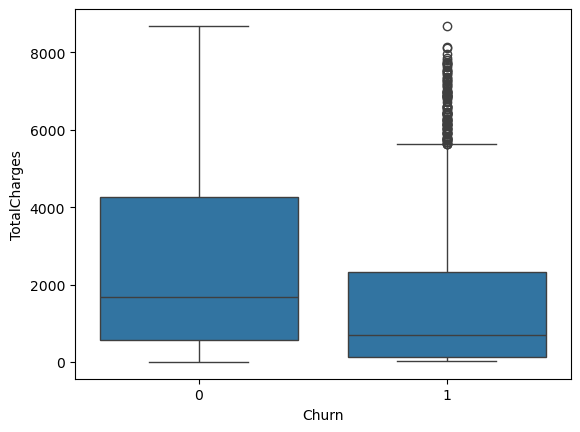

In [332]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

In [335]:
# index=False 주어야 기존 인덱스 값이 저장되지 않음
df.to_csv('data_v2.csv', index=False)

# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()